In [1]:
#EJ1
#Maximizar 
#Mínimo coste
#Pantalon=  1x + 2x
#Chaqueta=1.5y + 1y
#Funcion objetivo f(x,y)=50x +  40y
#Restricciones             x + 1.5y <=750
#                         2x + 1  y <=1000
#                          x        >=0
#                                 y >=0

In [42]:
# IMPORTANDO MÓDULOS NECESARIOS y TÍPICOS IO
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
import cvxopt
import pulp
from pyomo.environ import *
from pyomo.opt import SolverFactory
import pyomo.environ
from cvxopt import glpk

In [9]:
#Resolucion del problema con cvxplot
#Maximizar 
A=cvxopt.matrix([[-1.,-2.,1.,0.],    #Columna 1 Maximizar (-)
                  [-1.5,-1.,0.,1.]]) #Columna 2 Maximizar (-)
b=cvxopt.matrix([750.,1000.,0.,0.])  #Resultados Maximizar (+)
c=cvxopt.matrix([50.,40.]) #Función objetivo
#Resolviendo el problema
sol=cvxopt.solvers.lp(c,A,b)

     pcost       dcost       gap    pres   dres   k/t
 0: -2.5472e+04 -3.6797e+04  5e+03  0e+00  3e-01  1e+00
 1: -2.8720e+04 -2.9111e+04  1e+02  9e-17  9e-03  2e+01
 2: -2.8750e+04 -2.8754e+04  1e+00  2e-16  9e-05  2e-01
 3: -2.8750e+04 -2.8750e+04  1e-02  2e-16  9e-07  2e-03
 4: -2.8750e+04 -2.8750e+04  1e-04  8e-17  9e-09  2e-05
Optimal solution found.


In [10]:
print('{0:.2f}, {1:.2f}'.format(sol['x'][0]*-1, sol['x'][1]*-1))

375.00, 250.00


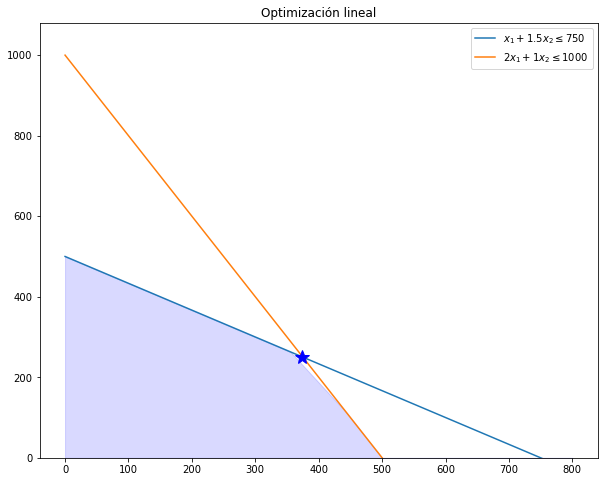

In [11]:
#Resolviendo la optimizacion graficamente
#Maximizar 
x_vals=np.linspace(0,800,10) #valores entre 0 y 800
y1=((750-x_vals)/1.5) #x + 1.5y <=750
y2=((1000-2*x_vals))
plt.figure(figsize=(10,8))
plt.plot(x_vals,y1,label=r'$x_1+1.5x_2 \leq 750$')
plt.plot(x_vals,y2,label=r'$2x_1+1x_2 \leq 1000$')
plt.plot(373,250,'b*',markersize=15)

# Región factible
y3 = np.minimum(y1, y2)
plt.fill_between(x_vals, 0, y3, alpha=0.15, color='b')
plt.axis(ymin = 0)
plt.title('Optimización lineal')
plt.legend()
plt.show()

In [1]:
#EJ2
#Maximizar
#Pantalon=  20x + 20x
#Chaqueta=  30y + 10y
#Funcion objetivo f(x,y)=15x +  10y
#Restricciones           20x + 30y <=6000
#                        20x + 10y <=4800
#                          x        >=0
#                                 y >=0
# intVars=range(2)

In [8]:
#Resolucion del problema con cvxplot
#Maximizar 
A=cvxopt.matrix([[-20.,-20.,1.,0.],    #Columna 1 Maximizar (-)
                  [-30,-10.,0.,1.]]) #Columna 2 Maximizar (-)
b=cvxopt.matrix([6000.,4800.,0.,0.])  #Resultados Maximizar (+)
c=cvxopt.matrix([15.,10.]) #Función objetivo
#Resolviendo el problema
sol=cvxopt.solvers.lp(c,A,b)

     pcost       dcost       gap    pres   dres   k/t
 0: -3.7424e+03 -1.5011e+04  3e+02  8e-04  3e+00  1e+00
 1: -3.7464e+03 -4.0027e+03  7e+00  2e-05  7e-02  2e-02
 2: -3.7500e+03 -3.7526e+03  7e-02  2e-07  7e-04  2e-04
 3: -3.7500e+03 -3.7500e+03  7e-04  2e-09  7e-06  2e-06
 4: -3.7500e+03 -3.7500e+03  7e-06  2e-11  7e-08  2e-08
Optimal solution found.


In [9]:
print('{0:.2f}, {1:.2f}'.format(sol['x'][0]*-1, sol['x'][1]*-1))

210.00, 60.00


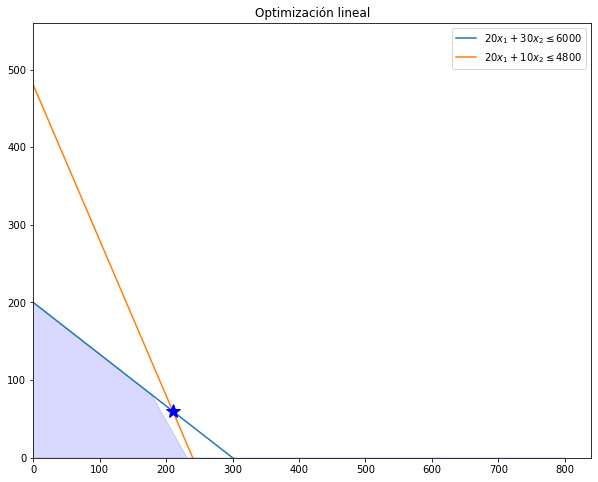

In [67]:
#Maximizar
#Resolviendo la optimizacion graficamente
x_vals=np.linspace(0,800,10) #valores entre 0 y 800
y1=((6000-20*x_vals)/30) #20x + 30y <=6000
y2=((4800-20*x_vals)/10) #20x + 10y <=4800
plt.figure(figsize=(10,8))
plt.plot(x_vals,y1,label=r'$20x_1+30x_2 \leq 6000$')
plt.plot(x_vals,y2,label=r'$20x_1+10x_2 \leq 4800$')
plt.plot(210,60,'b*',markersize=15)

# Región factible
y3 = np.minimum(y1, y2)
plt.fill_between(x_vals, 0, y3, alpha=0.15, color='b')
plt.axis(ymin = 0)
plt.axis(xmin = 0)
plt.title('Optimización lineal')
plt.legend()
plt.show()

In [37]:
#EJ3
#Minimizar
#Camion A=  20x + 30x
#Camion B=  40y + 30y
#Funcion objetivo f(x,y)=-30x - 40y
#Restricciones           20x + 30y >=3000
#                        40x + 30y >=4000
#                          x        >=0
#                                 y >=0

In [47]:
#Resolucion del problema con cvxopt
#Minimizar
A=cvxopt.matrix([[20.,40.,1.,0.],    #Columna 1 Minimizar (+)
                  [30,30.,0.,1.]]) #Columna 2 Minimizar (+)
b=cvxopt.matrix([-3000.,-4000.,0.,0.])  #Resulados Maximizar (+)
c=cvxopt.matrix([-30.,-40.]) #Función objetivo
#Resolviendo el problema mediante resultados enteros
intVars= range(2)
sol=cvxopt.glpk.ilp(c,A,b,I=set(intVars))
print('Los valores óptimos de las variables son: {0}n'.format(sol[1]*-1))
if sol[0]=='optimal':
    print('El valor óptimo es {0}'.format((c.T*sol[1])[0]))
    # El valor óptimo debemos transponerlo y cambiarle el signo, estamos maximizando.
else:
    print('El problema no devolvió una solución óptima. El estado del solucionador fue {0}'.format(sol[0]))

Los valores óptimos de las variables son: [ 5.10e+01]
[ 6.60e+01]
n
El valor óptimo es 4170.0


In [54]:
##valor de la funcion a optimizar
#Minimizar
g=(sol['x'][0]*-1, sol['x'][1]*-1)
mg = np.array(g)
c_=np.array([30,40])
opt=c_.dot(mg)
print('%.0f'%opt)

TypeError: tuple indices must be integers or slices, not str

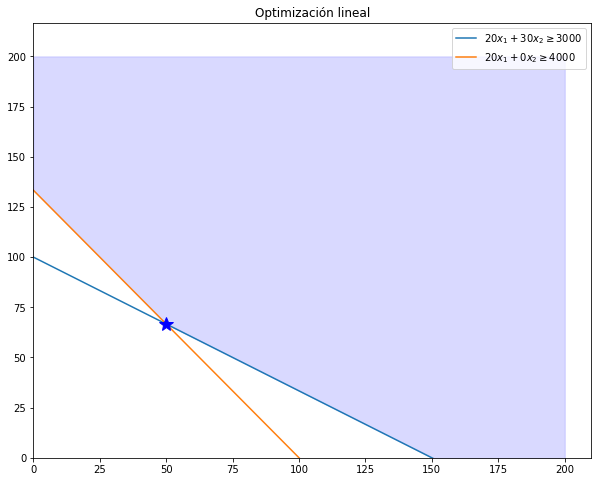

In [55]:
#Minimizar
#Resolviendo la optimizacion graficamente
x_vals=np.linspace(0,200,100) #10 valores entre 0 y 200
y1=((3000-20*x_vals)/30) #20x + 30y <=3000
y2=((4000-40*x_vals)/30) #40x + 30y <=4000
plt.figure(figsize=(10,8))
plt.plot(x_vals,y1,label=r'$20x_1+30x_2 \geq 3000$')
plt.plot(x_vals,y2,label=r'$20x_1+0x_2 \geq 4000$')
plt.plot(50,66.67,'b*',markersize=15)
intVars=range(2)
# Región factible
y3 = np.maximum(y1, y2)
plt.fill_between(x_vals, y3, 200, alpha=0.15, color='b')
plt.axis(xmin=0,ymin = 0)
plt.title('Optimización lineal')
plt.legend()
plt.show()

In [57]:
#EJ4
#Minimizar
#Tipo X=  x + 5x
#Tipo Y=  5y + by
#Funcion objetivo f(x,y)=-10x - 30y
#Restricciones              x +  5y >=15
#                          5x +   y >=15
#                          x        >=0
#                                 y >=0

In [58]:
#Resolucion del problema con cvxplot
#Minimizar EJ4
A=cvxopt.matrix([[-1.,-5.,1.,0.],    #Columna 1 Maximizar (-)
                  [-5,-1.,0.,1.]]) #Columna 2 Maximizar (-)
b=cvxopt.matrix([15.,15.,0.,0.])  #Resultados Maximizar (+)
c=cvxopt.matrix([10.,30.]) #Función objetivo
#Resolviendo el problema
sol=cvxopt.solvers.lp(c,A,b)

     pcost       dcost       gap    pres   dres   k/t
 0: -9.7297e+01 -1.6116e+02  1e+01  0e+00  5e-01  1e+00
 1: -9.9725e+01 -1.0181e+02  4e-01  3e-16  2e-02  2e-02
 2: -9.9997e+01 -1.0002e+02  4e-03  2e-16  2e-04  2e-04
 3: -1.0000e+02 -1.0000e+02  4e-05  4e-17  2e-06  2e-06
 4: -1.0000e+02 -1.0000e+02  4e-07  2e-16  2e-08  2e-08
Optimal solution found.


In [59]:
print('{0:.2f}, {1:.2f}'.format(sol['x'][0]*-1, sol['x'][1]*-1))

2.50, 2.50


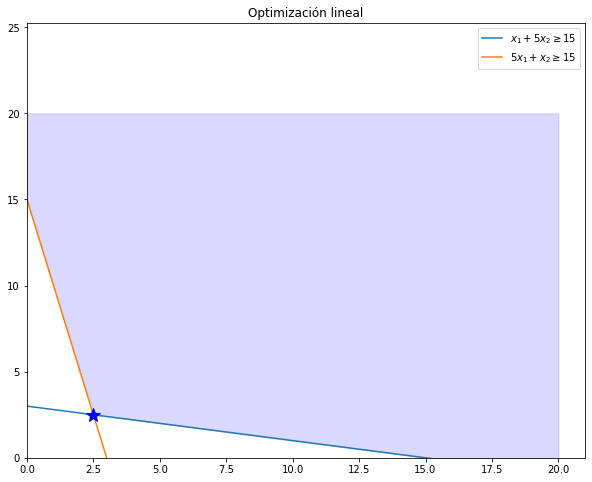

In [76]:
#Minimizar EJ4
#Resolviendo la optimizacion graficamente
x_vals=np.linspace(0,20,40) #valores entre 0 y 20
y1=((15-x_vals)/5) # x + 5y <=15
y2=((15-5*x_vals)) #5x +  y <=15
plt.figure(figsize=(10,8))
plt.plot(x_vals,y1,label=r'$x_1+5x_2 \geq 15$')
plt.plot(x_vals,y2,label=r'$5x_1+x_2 \geq 15$')
plt.plot(2.50,2.50,'b*',markersize=15)

# Región factible
y3 = np.maximum(y1, y2)
plt.fill_between(x_vals, 20, y3, alpha=0.15, color='b')
plt.axis(ymin = 0)
plt.axis(xmin = 0)
plt.title('Optimización lineal')
plt.legend()
plt.show()

In [77]:
#EJ5
#Maximizar
#Tipo X=  x + 5x
#Tipo Y=  5y + by
#Funcion objetivo f(x,y)# 2·x1+3·x2<=600
# Restricciones             x1+  x2<=500
#                         2·x1+  x2<=400
#                                x1>=0
#                                x2>=0

In [78]:
# Resolviendo el problema con cvxopt
#Maximizar EJ5
A = cvxopt.matrix([[-2., -1., -2, 1., 0.], # columna de x1
[-3., -1., -1., 0., 1.]]) # columna de x2
b = cvxopt.matrix([600., 500., 400., 0., 0.]) # resultados
c = cvxopt.matrix([6.5, 7.]) # funcion objetivo
# resolviendo el problema
sol=cvxopt.solvers.lp(c,A,b)

     pcost       dcost       gap    pres   dres   k/t
 0: -1.7577e+03 -3.8346e+03  1e+03  1e-01  8e-01  1e+00
 1: -1.6739e+03 -1.7578e+03  3e+01  4e-03  3e-02  7e-01
 2: -1.6750e+03 -1.6759e+03  3e-01  4e-05  3e-04  7e-03
 3: -1.6750e+03 -1.6750e+03  3e-03  4e-07  3e-06  7e-05
 4: -1.6750e+03 -1.6750e+03  3e-05  4e-09  3e-08  7e-07
Optimal solution found.


In [79]:
print('{0:.2f}, {1:.2f}'.format(sol['x'][0]*-1, sol['x'][1]*-1))

150.00, 100.00


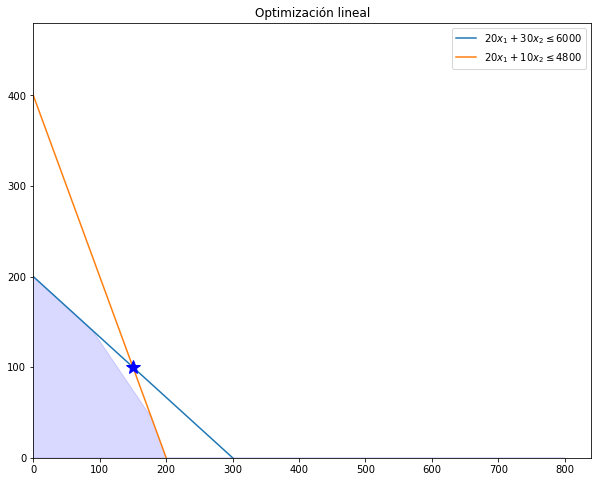

In [81]:
#Maximizar
#Resolviendo la optimizacion graficamente
x_vals=np.linspace(0,800,10) #valores entre 0 y 800
y1=((600-2*x_vals)/3) #2·x1+3·x2<=600
y2=((500-x_vals)) #x1+  x2<=500
y2=((400-2*x_vals)) #2·x1+  x2<=400
plt.figure(figsize=(10,8))
plt.plot(x_vals,y1,label=r'$20x_1+30x_2 \leq 6000$')
plt.plot(x_vals,y2,label=r'$20x_1+10x_2 \leq 4800$')
plt.plot(150,100,'b*',markersize=15)

# Región factible
y3 = np.minimum(y1, y2)
plt.fill_between(x_vals, 0, y3, alpha=0.15, color='b')
plt.axis(ymin = 0)
plt.axis(xmin = 0)
plt.title('Optimización lineal')
plt.legend()
plt.show()